# Исследование надежности заемщиков

**Описание проекта**
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.   
**Ход исследования:**   
Шаг 1. Изучение общей информации о данных   
Шаг 2. Предобработка данных   
* пропущенные значения   
* аномалии   
* тип данных в столбцах   
* дубликаты   
* категоризация данных 

Шаг 3. Исследование данных, ответы на вопросы    
Шаг 4. Общий вывод

Это первая часть проекта, она будет проверена автоматически. Вторую часть проверит ревьюер. 

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [104]:
import pandas as pd

In [105]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [107]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [109]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [110]:
data.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [92]:
#def find_median_income(itype):
 #   return (data.loc[data['income_type']==itype,'total_income'].median())

In [93]:
#data['total_income'] = data['total_income'].fillna(data['income_type'].apply(find_median_income))

In [111]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))

In [112]:
data.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [113]:
data['days_employed'] = abs(data['days_employed'])

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [114]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [115]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [116]:
data = data[(data['children']!= -1) & (data['children']!= 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [99]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [120]:
def find_median_days_employed(itype):
    return (data.loc[data['income_type']==itype,'days_employed'].median())

In [121]:
data['days_employed'] = data['days_employed'].fillna(data['income_type'].apply(find_median_days_employed))

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [122]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [123]:
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [124]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [125]:
data.duplicated().sum()

71

In [126]:
data = data.drop_duplicates().reset_index(drop=True)

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [128]:
# создайте функцию categorize_income()
def categorize_income(income):
    if income <= 30000: return 'E'
    if 30001 <= income <= 50000: return 'D'
    if 50001 <= income <= 200000: return 'C'
    if 200001 <= income <= 1000000: return 'B'
    if income >= 1000001: return 'A'

In [129]:
# примените функцию методом apply()
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [130]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [134]:
# создайте функцию categorize_purpose()
def categorize_purpose(purpose):
    if 'авто' in purpose: return 'операции с автомобилем'
    if ('недвиж' in purpose) | ('жил' in purpose) : return 'операции с недвижимостью'
    if 'свадьб' in purpose: return 'проведение свадьбы'
    if 'образов' in purpose: return 'получение образования'
    else: return 'unknown'

In [135]:
# примените функцию методом apply()
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [154]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

1. Дла начала напишем общую функцию, формирующую сводную таблицу для каждого вопроса. Для этого воспользуемся методом `pivot_table` и в нем применим к столбцу `'debt'` аггрегатные функции `'sum'` и `'count'` и `'mean`:

In [155]:
def get_data_pivot(pivot_index):
    data_pivot = data.pivot_table(index=pivot_index, values='debt', aggfunc=['count','sum', 'mean'])
    data_pivot = data_pivot.rename(columns={'count' : 'Всего кредитополучателей', 'sum' : 'Всего должников', 'mean': 'Доля должников'})
    return data_pivot

2. Сформируем сводную таблицу по категориям клиентов в зависимости от количества детей и найдем общее количество заемщиков, количество должников и долю должников для каждой категории:

In [156]:
data_pivot_by_children = get_data_pivot('children')
data_pivot_by_children

,Всего кредитополучателей,Всего должников,Доля должников
,debt,debt,debt
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


3. Для визуальной оценки результата построим диаграмму зависимости доли должников от количества детей:

<AxesSubplot:xlabel='children', ylabel='debt'>

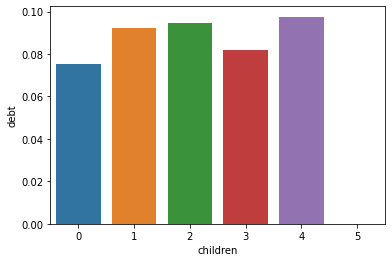

In [157]:
sn.barplot(x=data_pivot_by_children.index, y=data_pivot_by_children['Доля должников']['debt'])

**Вывод:** Полученные результаты позволяют сделать вывод о том, что более надежными заемщиками являются люди без детей, а наименее надежными - люди, имеющие 4-х детей. О надежности клиентов с 5-ю детьми вывод сделать не можем ввиду их малого количества.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

1. Сформируем сводную таблицу по категориям клиентов в зависимости от их семейного положения и найдем общее количество заемщиков, количество должников и долю должников для каждой категории:

In [158]:
data_pivot_by_family_status = get_data_pivot('family_status')
data_pivot_by_family_status

,Всего кредитополучателей,Всего должников,Доля должников
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


3. Для визуальной оценки результата построим диаграмму зависимости доли должников от семейного положения:

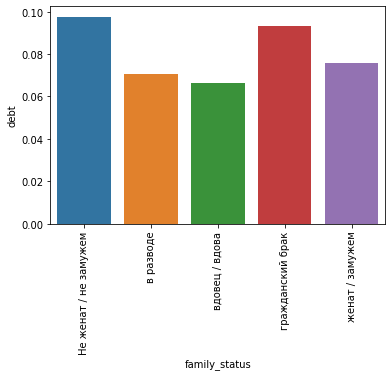

In [159]:
g = sn.barplot(x=data_pivot_by_family_status.index, y=data_pivot_by_family_status['Доля должников']['debt'])
g.tick_params(axis='x', rotation=90)

**Вывод:** Полученные результаты позволяют сделать вывод о том, что наибольший процент дожников среди тех, кто не женат/не замужем или находится в гражданском браке, и наименьший процент должников среди вдовцов/вдов.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

1. Сформируем сводную таблицу по категориям клиентов в зависимости от их уровня дохода:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`,
и найдем общее количество заемщиков, количество должников и долю должников для каждой категории:

In [160]:
data_pivot_by_income_category = get_data_pivot('total_income_category')
data_pivot_by_income_category

,Всего кредитополучателей,Всего должников,Доля должников
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


3.Для визуальной оценки результата построим диаграмму зависимости доли должников от категории уровня дохода:

<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

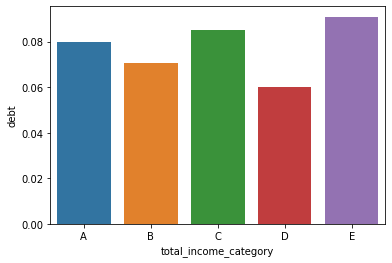

In [161]:
sn.barplot(x=data_pivot_by_income_category.index, y=data_pivot_by_income_category['Доля должников']['debt'])

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

**Вывод:** Полученные результаты позволяют сделать вывод о том, что прямой зависимости между уровнем дохода и возвратом кредита в срок нет, при этом наибольший процент должников среди тех, чей уровень дохода  менее 30000, а самыми дисциплинированными являются клиенты с доходом 30001 - 50000. Среди самых крупных по количеству заемщиков категорий: 
50001–200000 — 'C',
200001–1000000 — 'B' - наиболее дисциплинированными оказались клиенты с доходом 200001–1000000. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

1. Сформируем сводную таблицу по категориям клиентов в зависимости от их цели кредита:
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`,
и найдем общее количество заемщиков, количество должников и долю должников для каждой категории:

In [162]:
data_pivot_by_purpose_category = get_data_pivot('purpose_category')
data_pivot_by_purpose_category

,Всего кредитополучателей,Всего должников,Доля должников
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


3. Для визуальной оценки результата построим диаграмму зависимости доли должников от цели кредита:

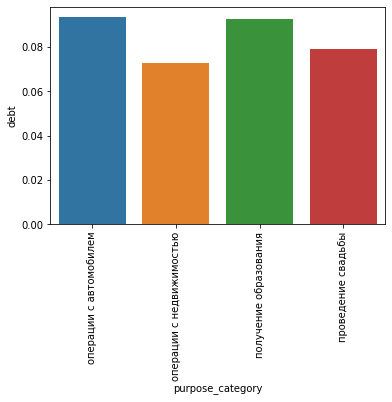

In [163]:
g4 = sn.barplot(x=data_pivot_by_purpose_category.index, y=data_pivot_by_purpose_category['Доля должников']['debt'])
g4.tick_params(axis='x', rotation=90)

**Вывод:** Полученные результаты позволяют сделать вывод о том, что наибольший процент должников среди тех, кто берет кредит на покупку авто или получение образования, и наименьший - среди тех, чьей целью являются операции с недвижимостью.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Проанализировав строки с пропусками, получили нааблюдение, что трудовой стаж пропущен у тех же клиентов, у которых отсутствует информация о среднем заарботке. Возможной причиной пропуска может быть то, что клиент вообще не указал сведений о работе при оформлении кредита. Существенное число пропусков говорит о том, что они неслучайны и могли возникнуть по причине ощибки на этапе выгрузки данных, либо в результате неправильного запроса/объединения таблиц.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Если информация о трудовом стаже и о среднем заработке отсутствует, то имеет место случай MNAR(Missing Not At Random). При MNAR просто игнорировать или исключить пропуски нельзя, так как это приведет к значительному искажению распределения статистических свойств выборки. При этом для количественных мы легко можем посчитать среднее значение и медианну. Заполнение пропусков количественных переменных нулями  или средним значением при наличии в выборке выбросов - может сильно исказить статистические свойства выборки, в то время как заполнение пропусков медианой не приведет к значительному ухудшению результатов, т.к. медиана позволяет нивелировать влияние выбросов.

### Шаг 4: общий вывод.

Проанализировав данные таблицы, сделали выводы, о том, что наибольшее количество должников наблюдается среди неженатых/незамужних клиентов или находящихся в гражданском браке, имеющих 4-х детей, с уровнем дохода менее 30000 и имеющих целью кредита покупку авто или получение образования.
Портрет "идеального" клиента можно описать следующим образом: вдовец/вдова без детей с доходом 200001–1000000, чьей целью кредита являются операции с недвижимостью.